
# Projet d'économétrie

In [295]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t, f

### 1.	Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [257]:
names = [
    'inlf',                    # =1 if in labor force, 1975
    'hours',                   # hours worked, 1975
    'kidslt6',                 # #kids < 6 years
    'kidsge6',                 # #kids 6-18
    'age',                     # woman's age in yrs
    'educ',                    # years of schooling
    'wage',                    # estimated wage from earns., hours
    'repwage',                 # reported wage at interview in 1976
    'hushrs',                  # hours worked by husband, 1975
    'husage',                  # husband's age
    'huseduc',                 # husband's years of schooling
    'huswage',                 # husband's hourly wage, 1975
    'faminc',                  # family income, 1975
    'mtr',                     # fed. marginal tax rate facing woman
    'motheduc',                # mother's years of schooling
    'fatheduc',                # father's years of schooling
    'unem',                    # unem. rate in county of resid.
    'city',                    # =1 if live in SMSA
    'exper',                   # actual labor mkt exper
    'nwifeinc',                # (faminc - wage*hours)/1000
    'lwage',                   # log(wage)
    'expersq',                 # exper^2
]

df = pd.read_csv('swbook1_3e\\textfiles\MROZ.raw', sep='\s+', names=names)
df = df.convert_objects(convert_numeric=True)

df = df[df["wage"]>0]

C:\Users\Mohamed\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation  pour l’ensemble des femmes

In [258]:
df[["wage", "age", "educ"]].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


### Salaire du mari supérieur à la médiane de l'échantillon

In [259]:
df[df["huswage"]>df["huswage"].median()][["wage", "age", "educ"]].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,4.896822,42.275701,13.242991
std,4.041606,7.388843,2.359045
min,0.161600,30.000000,5.000000
25%,2.513850,36.000000,12.000000
50%,3.846400,43.000000,12.000000
75%,5.854125,48.000000,16.000000
max,25.000000,59.000000,17.000000


### Salaire du mari inférieur à la médiane de l'échantillon

In [260]:
df[df["huswage"]<df["huswage"].median()][["wage", "age", "educ"]].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,3.458541,41.668224,12.074766
std,2.143274,8.045482,2.054200
min,0.128200,30.000000,6.000000
25%,2.117275,35.000000,12.000000
50%,2.971800,41.000000,12.000000
75%,4.393800,47.000000,12.000000
max,18.267000,60.000000,17.000000


### 3. 

C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


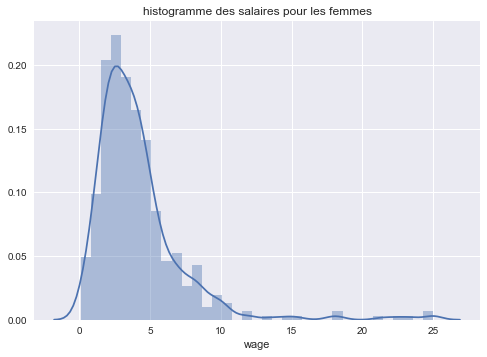

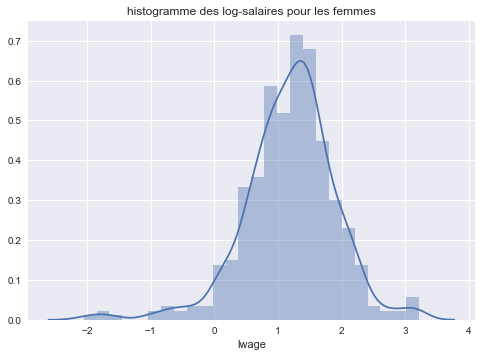

In [261]:
sns.distplot(df["wage"])
plt.title("histogramme des salaires pour les femmes")
plt.show()
sns.distplot(df["lwage"])
plt.title("histogramme des log-salaires pour les femmes")
plt.show()

### 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [262]:
from scipy.stats import spearmanr

print(np.corrcoef(df["motheduc"], df["fatheduc"]))
spearmanr(df["motheduc"], df["fatheduc"])

[[ 1.          0.55406322]
 [ 0.55406322  1.        ]]


SpearmanrResult(correlation=0.55073278223958799, pvalue=2.5800056955164742e-35)

### 5.

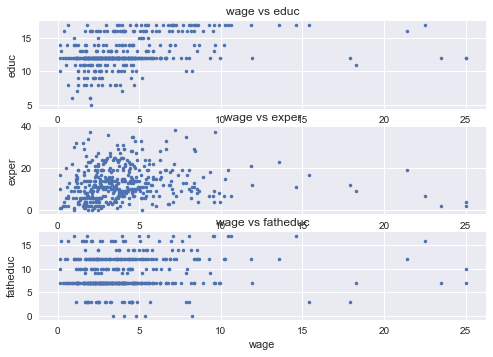

In [263]:
f, axarr = plt.subplots(3, 1)
axarr[0].plot(df["wage"], df["educ"], '.')
axarr[0].set_title('wage vs educ')
axarr[0].set_xlabel("wage")
axarr[0].set_ylabel("educ")

axarr[1].plot(df["wage"], df["exper"], '.')
axarr[1].set_title('wage vs exper')
axarr[1].set_xlabel("wage")
axarr[1].set_ylabel("exper")

axarr[2].plot(df["wage"], df["fatheduc"], '.')
axarr[2].set_title('wage vs fatheduc')
axarr[2].set_xlabel("wage")
axarr[2].set_ylabel("fatheduc")



plt.show()

### 6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le biais de variable omise

C'est la non-corrélation entre les variables explicatives et l'erreur. L'hypothèse permet de s'assurer d'avoir un estimateur sans biais : 

Hyputhèse : 
$$ E(X'u)=0 $$
$$ E(\hat{\beta}) = E(\beta) + (x'x)^{-1} E(X'u)$$

Si l'hypothèse n'est pas respectée
$$E(\hat{\beta}) \ne E(\beta)$$
Donc estimateur biaisé

### 7.	Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. 

In [264]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
X = df[variables]
X = np.zeros((X.shape[0], X.shape[1]+1))

X[:,0] = 1
X[:,1:] = df.ix[:, variables]
y_wage = df["wage"]


In [265]:
beta_wage = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_wage))

In [266]:
variables = ["constante", "city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
for i, item in enumerate(beta_wage):
    
    print(item, variables[i])

-2.40345399155 constante
0.369752029505 city
0.460047701259 educ
0.0238199479511 exper
0.0152447935763 nwifeinc
0.0361731913893 kidslt6
-0.0618909096857 kidsge6


In [267]:
y_pred_wage = np.dot(X, beta_wage)
res_wage = y_pred_wage - y_wage

C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


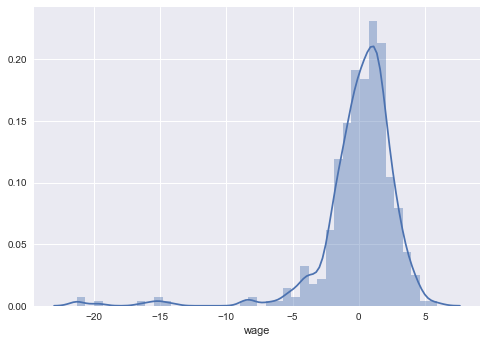

In [268]:
sns.distplot(res_wage)
plt.show()

Les résidus ne semblent pas suivre une loi normale centrée. On ne respecte pas les hypothèses du MCO.

In [269]:
from scipy.stats import normaltest
normaltest(res_wage)

NormaltestResult(statistic=345.82470863763069, pvalue=8.0374570731805143e-76)

### 8.	Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.

In [270]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
X = df[variables]
X = np.zeros((X.shape[0], X.shape[1]+1))
print(np.shape(X))
X[:,0] = 1
X[:,1:] = df.ix[:, variables]
y_lwage = df["lwage"]
beta_lwage = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_lwage))

(428, 7)


In [271]:
variables = ["constante", "city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
for i, item in enumerate(beta):
    
    print(item, variables[i])

-0.398975226675 constante
0.0352678929323 city
0.10224754784 educ
0.0154878720958 exper
0.00488269568156 nwifeinc
-0.0453028703817 kidslt6
-0.0117035067044 kidsge6


In [272]:
y_pred_lwage = np.dot(X, beta_lwage)
res_lwage = y_pred_lwage - y_lwage

C:\Users\Mohamed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


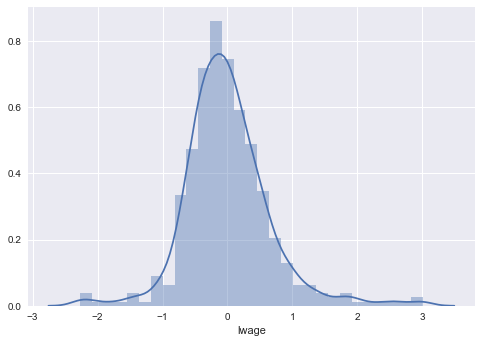

In [273]:
sns.distplot(res_lwage)
plt.show()

In [274]:
from scipy.stats import normaltest
normaltest(res_lwage)

NormaltestResult(statistic=79.542467346437277, pvalue=5.3403863507047204e-18)

L'hypothèse nulle de normalité des résidus est rejetée.

### 9.	Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [275]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res_lwage.T, res_lwage) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_exper = beta_lwage[3]/std[3]
print(t_exper)

3.45171828081


In [276]:
p_val = 2*t.sf(np.abs(t_exper), ddl)
print("p_value : ", p_val)

p_value :  0.000613365079014


In [277]:
t_student1 = t.ppf(1-0.01/2,df=df.shape[0]-7)
print("Statistique de test à 1% : ", t_student1)
t_student5 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("Statistique de test à 5% : ", t_student5)
t_student10 = t.ppf(1-0.1/2,df=df.shape[0]-7)
print("Statistique de test à 10% : ", t_student10)

Statistique de test à 1% :  2.58755757305
Statistique de test à 5% :  1.96561479201
Statistique de test à 10% :  1.64848105713


On rejète pour les troix tests l'hypothèse nulle $H_0 : B_{exper} = 0$ 

### 10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [278]:
t_educ = beta_lwage[2]/std[2]
p_val = 2*t.sf(np.abs(t_educ), ddl)
print(t_educ)
print("p_value : ", p_val)
t_student5 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("Statistique de test à 5% : ", t_student5)

6.77056178537
p_value :  4.32452637615e-11
Statistique de test à 5% :  1.96561479201


### 11.	Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.

In [279]:
variables = ["city", "nwifeinc", "kidslt6", "kidsge6"]
X_2 = df[variables]
X_2 = np.zeros((X_2.shape[0], X_2.shape[1]+1))
print(np.shape(X_2))
X_2[:,0] = 1
X_2[:,1:] = df.ix[:, variables]
y_lwage_2 = df["lwage"]
beta_lwage_2 = np.dot(np.linalg.inv(np.dot(X_2.T, X_2)), np.dot(X_2.T, y_lwage_2))

(428, 5)


In [280]:
y_pred_lwage_2 = np.dot(X_2, beta_lwage_2)
res_lwage_2 = y_pred_lwage_2 - y_lwage_2

In [291]:
SSR1 = np.dot(res_lwage.T, res_lwage)
SSR0 = np.dot(res_lwage_2.T, res_lwage_2)
ddl0 = X.shape[0]-X.shape[1]
ddl1 = X_2.shape[0]-X_2.shape[1]

F = ((SSR0 - SSR1)/SSR1) * (ddl0 / (ddl1 - ddl0))

In [359]:
print("p-value")
2*f.sf(F, 2, X.shape[0]-7)

p-value


0.4092306203025744

In [297]:
f.ppf(0.975,2,df.shape[0]-7)

3.7213917359468551

On rejette ainsi au risque 5%, l'hypothèse nulle. Selon le test, les deux coefficients sont significatifs.

### 12.	De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

In [302]:
print("Avec 10 année d'expérience, le salaire augmentera, selon le modèle, \
de ", np.round(beta_lwage[3]*10*100, 2))

Avec 10 année d'expérience, le salaire augmentera, selon le modèle, de  15.49


### 13.	Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [305]:
y = df["lwage"].as_matrix()
X = np.zeros((df.shape[0],6))
X[:,0] = 1
df_modify = df.ix[:, ["city","educ","exper","nwifeinc","kidslt6","kidsge6"]]
df_modify["tot_kids"] = df["kidslt6"] + df["kidsge6"]
X[:,1:] = df_modify.ix[:, ["city","educ","exper","nwifeinc","tot_kids"]]

In [307]:
coef = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
list(map(lambda x: print(x),
    zip(["constante","city","educ","exper","nwifeinc","tot_kids"], coef)))

('constante', -0.38924089405754003)
('city', 0.034308108767335366)
('educ', 0.10126983187747757)
('exper', 0.015574150465735404)
('nwifeinc', 0.0050084015509880651)
('tot_kids', -0.015030027263000623)


[None, None, None, None, None, None]

In [309]:
beta_totkids = coef[5]
y_pred = coef[0] + np.dot(X[:,1:], coef[1:])
res = y_pred - y
sig2= np.dot(res.T,res)/ (df.shape[0]-5)
std=np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T,X))))

In [310]:
t_totkids = beta_totkids/ std[5]
print("Statistique de test : ", t_totkids)
p_val =  2.0 * (1.0 - t.cdf(np.abs( t_totkids),df.shape[0]-5))
print("P-value : ", p_val)

Statistique de test :  -0.592687383731
P-value :  0.553707092749


On ne rejette pas l'hypothèse nulle, les coefficients sont égaux au risque 5%. 

### 14.	En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [348]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
X = df[variables]
X = np.zeros((X.shape[0], X.shape[1]+1))

X[:,0] = 1
X[:,1:] = df.ix[:, variables]
y_res = res_wage**2


In [349]:
beta_res = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_res))

In [350]:
epsilon = np.dot(X, beta_res) - y_res
SSR1 = np.dot(epsilon.T, epsilon)

In [351]:
X_0 = np.zeros((X.shape[0], 1))
X_0[:,0] = 1

In [352]:
beta_res = np.dot(np.linalg.inv(np.dot(X_0.T, X_0)), np.dot(X_0.T, y_res))

In [353]:
epsilon = np.dot(X_0, beta_res) - y_res
SSR0 = np.dot(epsilon.T, epsilon)

In [354]:
beta_res

array([ 9.54162047])

In [357]:
ddl1 = X.shape[0]-X.shape[1]
ddl0 = X.shape[0]-1

F = ((SSR0 - SSR1)/SSR1) * (ddl1 / (ddl0 - ddl1))

In [361]:
print("p-value", 2*f.sf(F, ddl0-ddl1, ddl1))
print("stat de test", f.ppf(0.975, ddl0-ddl1, ddl1))


p-value 0.29532266629
stat de test 2.43830200742
